<div dir="rtl" style="text-align: right;">
    
### **تمرین سری سوم هوش مصنوعی**
### **محمدمهدی تویسرکانی**
### **تاریخ تحویل : 1404/2/24**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<div dir="rtl" style="text-align: right;">
    
### **خواندن اطلاعات با dataframe**

In [5]:
df = pd.read_csv("milling_machine.csv")

<div dir="rtl" style="text-align: right;">
    
### **الف-1**

In [8]:
print("Data Info:")
print(df.info())
print("\nData Description:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air Temp (°C)           9965 non-null   float64
 1   Process Temp (°C)       9990 non-null   float64
 2   Rotational Speed (RPM)  10000 non-null  float64
 3   Torque (Nm)             10000 non-null  float64
 4   Tool Wear (Seconds)     9993 non-null   float64
 5   Failure Types           9991 non-null   object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB
None

Data Description:
       Air Temp (°C)  Process Temp (°C)  Rotational Speed (RPM)   Torque (Nm)  \
count    9965.000000        9990.000000            10000.000000  10000.000000   
mean       28.516926          80.812186             1401.909988     46.998845   
std         7.719340          15.548350              968.446183     26.747646   
min        20.001366          60.001876                0

<div dir="rtl" style="text-align: right;">
    
### **الف-2**

In [11]:
missing_count = df.isnull().sum()
missing_proportion = df.isnull().mean()

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Proportion": missing_proportion
})
print("\nMissing Values Info:")
print(missing_df)


Missing Values Info:
                        Missing Count  Missing Proportion
Air Temp (°C)                      35              0.0035
Process Temp (°C)                  10              0.0010
Rotational Speed (RPM)              0              0.0000
Torque (Nm)                         0              0.0000
Tool Wear (Seconds)                 7              0.0007
Failure Types                       9              0.0009


<div dir="rtl" style="text-align: right;">
    
### **الف-3**


Correlation Matrix:
                        Air Temp (°C)  Process Temp (°C)  \
Air Temp (°C)                1.000000           0.693634   
Process Temp (°C)            0.693634           1.000000   
Rotational Speed (RPM)       0.156958          -0.086616   
Torque (Nm)                  0.213051           0.002808   
Tool Wear (Seconds)         -0.266371           0.188924   
Failure Types                0.229993           0.352946   

                        Rotational Speed (RPM)  Torque (Nm)  \
Air Temp (°C)                         0.156958     0.213051   
Process Temp (°C)                    -0.086616     0.002808   
Rotational Speed (RPM)                1.000000     0.888487   
Torque (Nm)                           0.888487     1.000000   
Tool Wear (Seconds)                  -0.256103    -0.216528   
Failure Types                        -0.183382    -0.241391   

                        Tool Wear (Seconds)  Failure Types  
Air Temp (°C)                     -0.266371       0.229

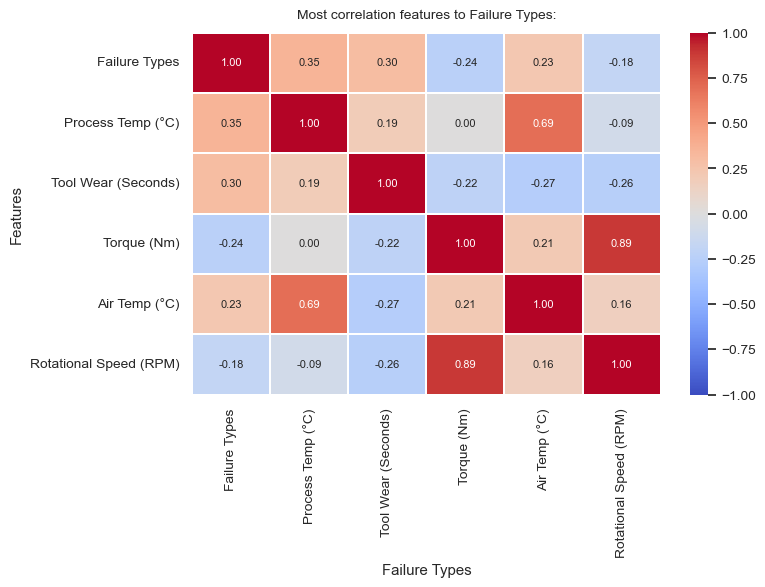

In [14]:
df_encoded = df.copy()
df_encoded['Failure Types'] = df_encoded['Failure Types'].apply(lambda x: 0 if x == 'No Failure' else 1)

correlation_matrix = df_encoded.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

target_corr = correlation_matrix["Failure Types"].drop("Failure Types").abs().sort_values(ascending=False)
top_3_features = target_corr.head(3).index.tolist()
print("\nTop 3 Features Most Correlated with 'Failure Types':")
print(top_3_features)

# heatmap plot
top_features = correlation_matrix['Failure Types'].abs().sort_values(ascending=False).index[0:39]
top_corr_with_Failure_Types = pd.DataFrame(correlation_matrix.loc[top_features, top_features])
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.9)
ax = sns.heatmap(top_corr_with_Failure_Types,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                cbar=True,
                vmin=-1, vmax=1,
                linewidths=0.3,
                annot_kws={"size": 8})

plt.title("Most correlation features to Failure Types:", pad=10, fontsize=10)
plt.xlabel("Failure Types", labelpad=4)
plt.ylabel("Features", labelpad=4)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right;">
    
### **الف-4**

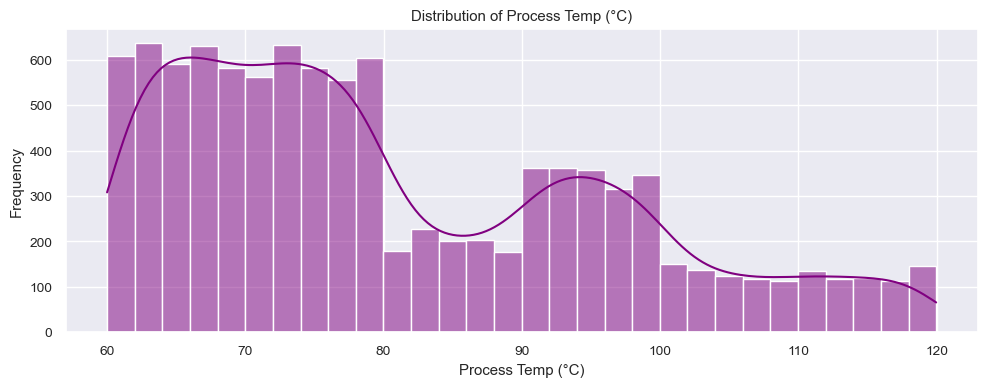

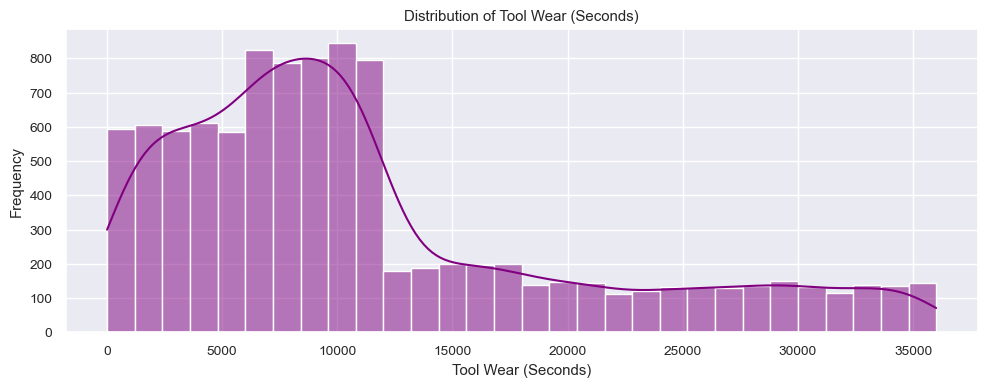

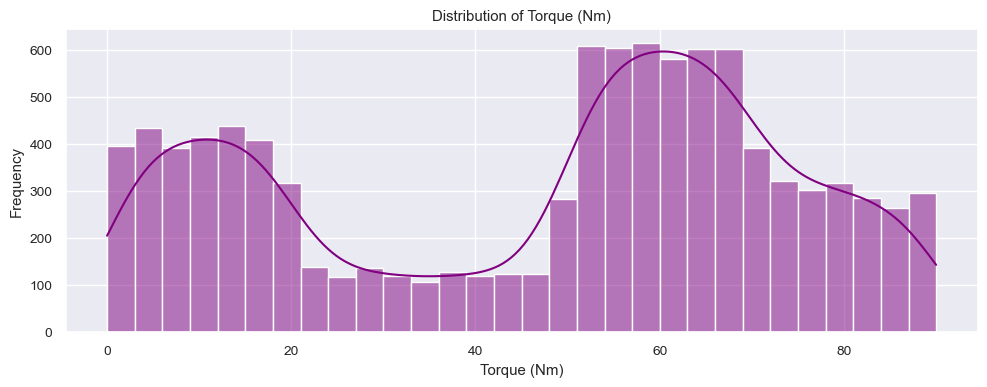

In [17]:
for feature in top_3_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature].dropna(), bins=30, kde=True, color='purple')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<div dir="rtl" style="text-align: right;">
    
### **ب-1**

In [20]:
df['Air Temp (°C)'] = df['Air Temp (°C)'].fillna(df['Air Temp (°C)'].median())
df['Process Temp (°C)'] = df['Process Temp (°C)'].fillna(df['Process Temp (°C)'].median())
df['Tool Wear (Seconds)'] = df['Tool Wear (Seconds)'].fillna(df['Tool Wear (Seconds)'].median())
df['Failure Types'] = df['Failure Types'].fillna(df['Failure Types'].mode()[0])

<div dir="rtl" style="text-align: right;">
    
### **ب-2**

In [23]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
features = ['Air Temp (°C)', 'Process Temp (°C)', 'Rotational Speed (RPM)', 
            'Torque (Nm)', 'Tool Wear (Seconds)']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

<div dir="rtl" style="text-align: right;">
    
### **ج-1**

In [26]:
df['Health Status'] = df['Failure Types'].apply(lambda x: 'Healthy' if x == 'No Failure' else 'Defective')

<div dir="rtl" style="text-align: right;">
    
### **ج-2**

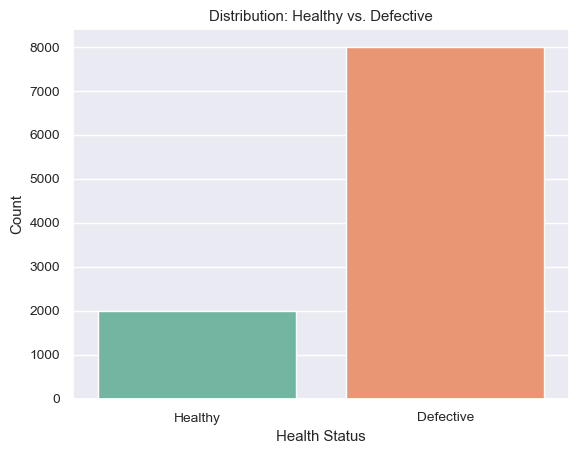

In [29]:
sns.countplot(data=df, x='Health Status', hue='Health Status', palette='Set2', legend=False)
plt.title('Distribution: Healthy vs. Defective')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

<div dir="rtl" style="text-align: right;">
    
### **ج-4**

In [32]:
X = df[features]
y = df['Health Status']

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

<div dir="rtl" style="text-align: right;">
    
### **ج-5**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

<div dir="rtl" style="text-align: right;">
    
### **ج-6**

In [44]:
models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM Linear': svm_linear,
    'SVM RBF': svm_rbf
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append((name, acc, report))

comparison_table = []

for name, acc, report in results:
    comparison_table.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision (Healthy)': round(report['Healthy']['precision'], 4),
        'Recall (Healthy)': round(report['Healthy']['recall'], 4),
        'F1-score (Healthy)': round(report['Healthy']['f1-score'], 4),
        'Precision (Defective)': round(report['Defective']['precision'], 4),
        'Recall (Defective)': round(report['Defective']['recall'], 4),
        'F1-score (Defective)': round(report['Defective']['f1-score'], 4),
        'Macro F1-score': round(report['macro avg']['f1-score'], 4)
    })

performance_df = pd.DataFrame(comparison_table)
print(performance_df)

                 Model  Accuracy  Precision (Healthy)  Recall (Healthy)  \
0  Logistic Regression    0.8394               0.8070            0.8815   
1                  KNN    1.0000               1.0000            1.0000   
2           SVM Linear    0.8497               0.8007            0.9212   
3              SVM RBF    1.0000               1.0000            1.0000   

   F1-score (Healthy)  Precision (Defective)  Recall (Defective)  \
0              0.8426                 0.8763              0.7994   
1              1.0000                 1.0000              1.0000   
2              0.8567                 0.9125              0.7817   
3              1.0000                 1.0000              1.0000   

   F1-score (Defective)  Macro F1-score  
0                0.8361          0.8394  
1                1.0000          1.0000  
2                0.8420          0.8494  
3                1.0000          1.0000  


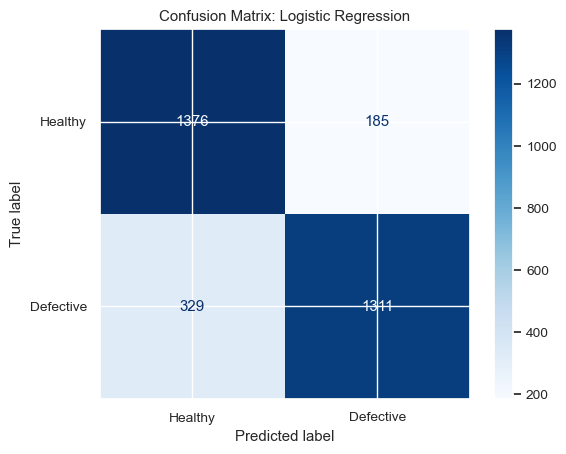

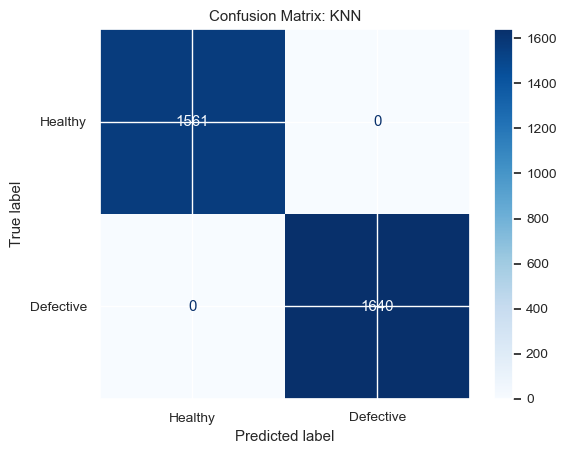

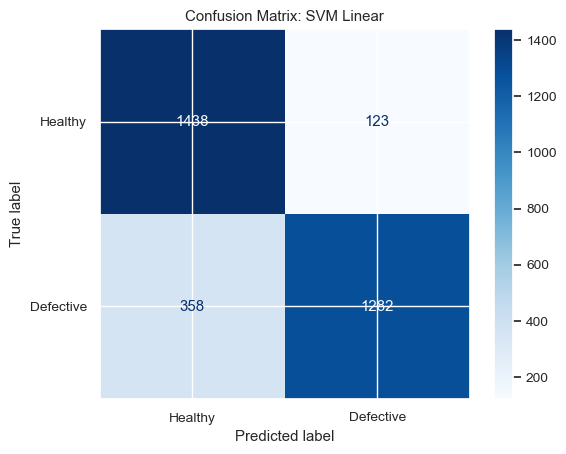

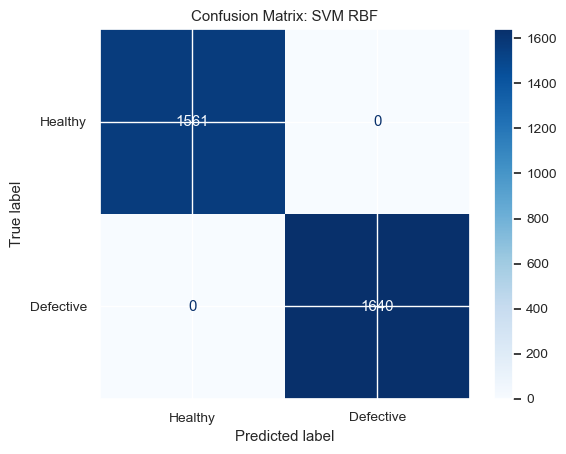

In [46]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=['Healthy', 'Defective'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Defective'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

<div dir="rtl" style="text-align: right;">
    
### **ج-7**

In [49]:
param_log = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_log = GridSearchCV(LogisticRegression(), param_log, cv=5)
grid_log.fit(X_train, y_train)

param_knn = {'n_neighbors': list(range(3, 11))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)

param_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1]}
grid_svm = GridSearchCV(SVC(kernel='rbf'), param_svm, cv=5)
grid_svm.fit(X_train, y_train)

param_svm_linear = {'C': [0.1, 1, 10]}
grid_svm_linear = GridSearchCV(SVC(kernel='linear'), param_svm_linear, cv=5)
grid_svm_linear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10]})

In [51]:
print("Best Hyperparameters Found by GridSearchCV:")
print("Logistic Regression:", grid_log.best_params_)
print("KNN:", grid_knn.best_params_)
print("SVM RBF:", grid_svm.best_params_)
print("SVM Linear:", grid_svm_linear.best_params_)

Best Hyperparameters Found by GridSearchCV:
Logistic Regression: {'C': 10, 'penalty': 'l2'}
KNN: {'n_neighbors': 6}
SVM RBF: {'C': 10, 'gamma': 'scale'}
SVM Linear: {'C': 0.1}


<div dir="rtl" style="text-align: right;">
    
### **ج-8**

In [54]:
optimized_models = {
    'Logistic Regression (Tuned)': grid_log.best_estimator_,
    'KNN (Tuned)': grid_knn.best_estimator_,
    'SVM RBF (Tuned)': grid_svm.best_estimator_,
    'SVM Linear (Tuned)': grid_svm_linear.best_estimator_
}

optimized_results = []

for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    optimized_results.append((name, acc, report))

tuned_comparison = []

for name, acc, report in optimized_results:
    tuned_comparison.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision (Healthy)': round(report['Healthy']['precision'], 4),
        'Recall (Healthy)': round(report['Healthy']['recall'], 4),
        'F1-score (Healthy)': round(report['Healthy']['f1-score'], 4),
        'Precision (Defective)': round(report['Defective']['precision'], 4),
        'Recall (Defective)': round(report['Defective']['recall'], 4),
        'F1-score (Defective)': round(report['Defective']['f1-score'], 4),
        'Macro F1-score': round(report['macro avg']['f1-score'], 4)
    })

tuned_df = pd.DataFrame(tuned_comparison)
print(tuned_df)

                         Model  Accuracy  Precision (Healthy)  \
0  Logistic Regression (Tuned)    0.8391               0.8069   
1                  KNN (Tuned)    1.0000               1.0000   
2              SVM RBF (Tuned)    1.0000               1.0000   
3           SVM Linear (Tuned)    0.8485               0.7976   

   Recall (Healthy)  F1-score (Healthy)  Precision (Defective)  \
0            0.8808              0.8423                 0.8758   
1            1.0000              1.0000                 1.0000   
2            1.0000              1.0000                 1.0000   
3            0.9238              0.8560                 0.9146   

   Recall (Defective)  F1-score (Defective)  Macro F1-score  
0              0.7994                0.8358          0.8390  
1              1.0000                1.0000          1.0000  
2              1.0000                1.0000          1.0000  
3              0.7768                0.8401          0.8481  


<div dir="rtl" style="text-align: right;">
    
### **د-1**

In [57]:
X = df[features]
y = df['Failure Types']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM (OvR)': SVC(decision_function_shape='ovr')
}

results = []

<div dir="rtl" style="text-align: right;">
    
### **د-2**

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append((name, acc, report))

summary = []

for name, acc, report in results:
    summary.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Macro F1-score': round(report['macro avg']['f1-score'], 4),
        'Weighted F1-score': round(report['weighted avg']['f1-score'], 4)
    })

import pandas as pd
results_df = pd.DataFrame(summary)
print(results_df)

           Model  Accuracy  Macro F1-score  Weighted F1-score
0            KNN    0.9995          0.9995             0.9995
1  Decision Tree    0.9980          0.9980             0.9980
2  Random Forest    0.9995          0.9995             0.9995
3      SVM (OvR)    0.9995          0.9995             0.9995


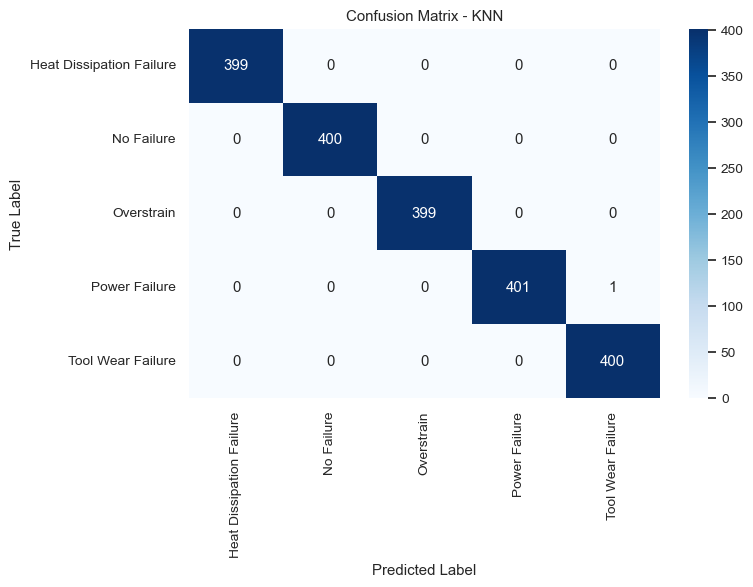

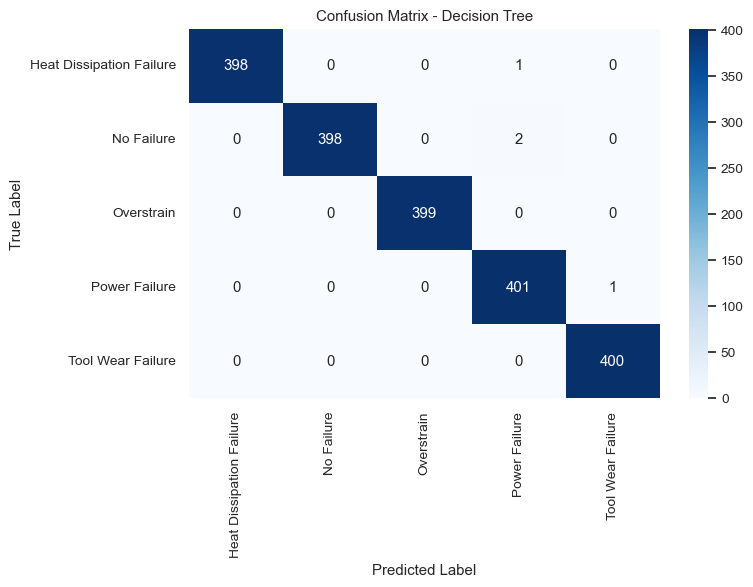

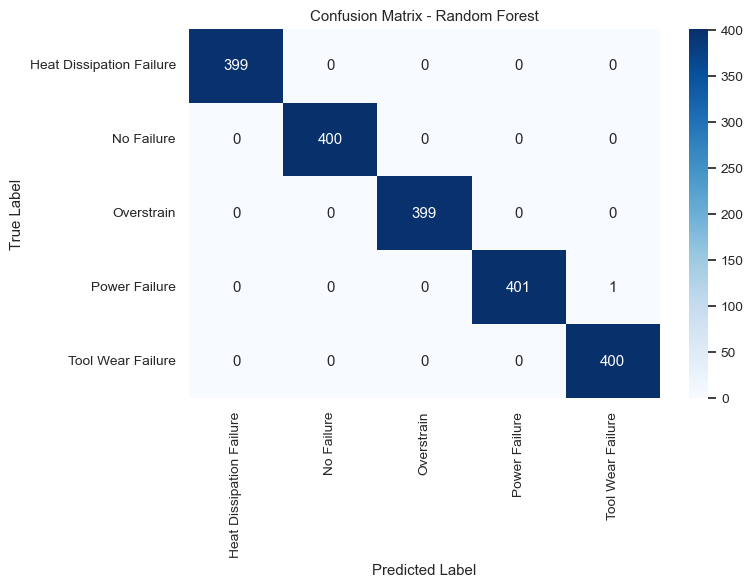

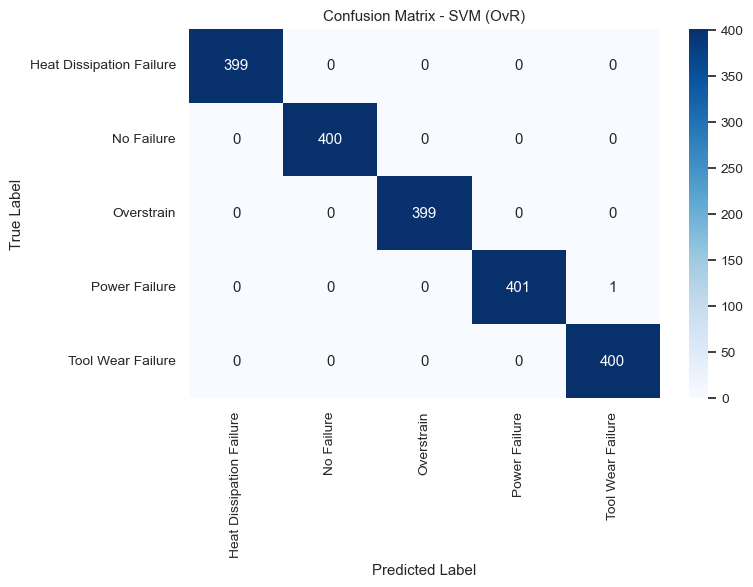

In [68]:
labels = sorted(y.unique())

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

<div dir="rtl" style="text-align: right;">
    
### **د-3**

In [71]:
param_knn = {'n_neighbors': list(range(3, 11))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)

param_dt = {'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=5)
grid_dt.fit(X_train, y_train)

param_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5)
grid_rf.fit(X_train, y_train)

param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(decision_function_shape='ovr'), param_svm, cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [73]:
print("Best Hyperparameters Found by GridSearchCV:")
print("KNN:", grid_knn.best_params_)
print("Decision Tree:", grid_dt.best_params_)
print("Random Forest:", grid_rf.best_params_)
print("SVM ovr:", grid_svm.best_params_)

Best Hyperparameters Found by GridSearchCV:
KNN: {'n_neighbors': 4}
Decision Tree: {'criterion': 'entropy', 'max_depth': 5}
Random Forest: {'max_depth': 5, 'n_estimators': 50}
SVM ovr: {'C': 10, 'kernel': 'linear'}


<div dir="rtl" style="text-align: right;">
    
### **د-4**

In [76]:
tuned_models = {
    'KNN (Tuned)': grid_knn.best_estimator_,
    'Decision Tree (Tuned)': grid_dt.best_estimator_,
    'Random Forest (Tuned)': grid_rf.best_estimator_,
    'SVM (Tuned)': grid_svm.best_estimator_
}

tuned_results = []

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    tuned_results.append((name, acc, report))

final_summary = []

for name, acc, report in tuned_results:
    final_summary.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Macro F1-score': round(report['macro avg']['f1-score'], 4),
        'Weighted F1-score': round(report['weighted avg']['f1-score'], 4)
    })

tuned_df = pd.DataFrame(final_summary)
print(tuned_df)

                   Model  Accuracy  Macro F1-score  Weighted F1-score
0            KNN (Tuned)    0.9995          0.9995             0.9995
1  Decision Tree (Tuned)    0.9990          0.9990             0.9990
2  Random Forest (Tuned)    0.9995          0.9995             0.9995
3            SVM (Tuned)    0.9995          0.9995             0.9995
